In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os
import tensorflow as tf

In [27]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [28]:
df_pre = pd.read_csv('dataset/wine_train.csv', header=None)

print(df_pre.shape)
df_pre.head()

(5000, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.1,0.21,0.28,2.7,0.034,23.0,111.0,0.99405,3.35,0.64,10.2,4,0
1,6.5,0.22,0.29,7.4,0.028,16.0,87.0,0.99311,3.15,0.56,10.9,7,0
2,6.8,0.29,0.49,1.4,0.142,52.0,148.0,0.99370,3.08,0.49,9.0,6,0
3,7.4,0.24,0.40,4.3,0.032,9.0,95.0,0.99200,3.09,0.39,11.1,6,0
4,6.8,0.19,0.23,5.1,0.034,71.0,204.0,0.99420,3.23,0.69,10.1,5,0


In [29]:
# 피쳐, 타깃값 분리
dataset = df_pre.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [30]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [32]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


In [33]:
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [34]:
# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [35]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [36]:
history = model.fit(X, Y, validation_split=0.2, 
                  epochs=3500, 
                  batch_size=500, verbose=0, 
                  callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.88528, saving model to ./model\01-0.8853.hdf5

Epoch 2: val_loss improved from 0.88528 to 0.46214, saving model to ./model\02-0.4621.hdf5

Epoch 3: val_loss improved from 0.46214 to 0.34757, saving model to ./model\03-0.3476.hdf5

Epoch 4: val_loss improved from 0.34757 to 0.32276, saving model to ./model\04-0.3228.hdf5

Epoch 5: val_loss improved from 0.32276 to 0.29932, saving model to ./model\05-0.2993.hdf5

Epoch 6: val_loss improved from 0.29932 to 0.27963, saving model to ./model\06-0.2796.hdf5

Epoch 7: val_loss improved from 0.27963 to 0.26560, saving model to ./model\07-0.2656.hdf5

Epoch 8: val_loss improved from 0.26560 to 0.25341, saving model to ./model\08-0.2534.hdf5

Epoch 9: val_loss improved from 0.25341 to 0.24568, saving model to ./model\09-0.2457.hdf5

Epoch 10: val_loss improved from 0.24568 to 0.24108, saving model to ./model\10-0.2411.hdf5

Epoch 11: val_loss improved from 0.24108 to 0.23725, saving model to ./model\11-0.


Epoch 97: val_loss improved from 0.11475 to 0.11301, saving model to ./model\97-0.1130.hdf5

Epoch 98: val_loss did not improve from 0.11301

Epoch 99: val_loss improved from 0.11301 to 0.11272, saving model to ./model\99-0.1127.hdf5

Epoch 100: val_loss improved from 0.11272 to 0.11063, saving model to ./model\100-0.1106.hdf5

Epoch 101: val_loss improved from 0.11063 to 0.10984, saving model to ./model\101-0.1098.hdf5

Epoch 102: val_loss improved from 0.10984 to 0.10950, saving model to ./model\102-0.1095.hdf5

Epoch 103: val_loss did not improve from 0.10950

Epoch 104: val_loss did not improve from 0.10950

Epoch 105: val_loss improved from 0.10950 to 0.10627, saving model to ./model\105-0.1063.hdf5

Epoch 106: val_loss improved from 0.10627 to 0.10598, saving model to ./model\106-0.1060.hdf5

Epoch 107: val_loss did not improve from 0.10598

Epoch 108: val_loss did not improve from 0.10598

Epoch 109: val_loss improved from 0.10598 to 0.10388, saving model to ./model\109-0.1039.


Epoch 215: val_loss improved from 0.06306 to 0.06204, saving model to ./model\215-0.0620.hdf5

Epoch 216: val_loss improved from 0.06204 to 0.06149, saving model to ./model\216-0.0615.hdf5

Epoch 217: val_loss did not improve from 0.06149

Epoch 218: val_loss did not improve from 0.06149

Epoch 219: val_loss did not improve from 0.06149

Epoch 220: val_loss did not improve from 0.06149

Epoch 221: val_loss did not improve from 0.06149

Epoch 222: val_loss improved from 0.06149 to 0.06119, saving model to ./model\222-0.0612.hdf5

Epoch 223: val_loss did not improve from 0.06119

Epoch 224: val_loss did not improve from 0.06119

Epoch 225: val_loss did not improve from 0.06119

Epoch 226: val_loss did not improve from 0.06119

Epoch 227: val_loss did not improve from 0.06119

Epoch 228: val_loss did not improve from 0.06119

Epoch 229: val_loss did not improve from 0.06119

Epoch 230: val_loss did not improve from 0.06119

Epoch 231: val_loss improved from 0.06119 to 0.06097, saving mod


Epoch 365: val_loss did not improve from 0.05321

Epoch 366: val_loss did not improve from 0.05321

Epoch 367: val_loss did not improve from 0.05321

Epoch 368: val_loss did not improve from 0.05321

Epoch 369: val_loss did not improve from 0.05321

Epoch 370: val_loss did not improve from 0.05321

Epoch 371: val_loss did not improve from 0.05321

Epoch 372: val_loss did not improve from 0.05321

Epoch 373: val_loss improved from 0.05321 to 0.05316, saving model to ./model\373-0.0532.hdf5

Epoch 374: val_loss did not improve from 0.05316

Epoch 375: val_loss did not improve from 0.05316

Epoch 376: val_loss did not improve from 0.05316

Epoch 377: val_loss did not improve from 0.05316

Epoch 378: val_loss did not improve from 0.05316

Epoch 379: val_loss did not improve from 0.05316

Epoch 380: val_loss did not improve from 0.05316

Epoch 381: val_loss did not improve from 0.05316

Epoch 382: val_loss did not improve from 0.05316

Epoch 383: val_loss did not improve from 0.05316

Epoc


Epoch 527: val_loss did not improve from 0.05217

Epoch 528: val_loss did not improve from 0.05217

Epoch 529: val_loss did not improve from 0.05217

Epoch 530: val_loss did not improve from 0.05217

Epoch 531: val_loss did not improve from 0.05217

Epoch 532: val_loss did not improve from 0.05217

Epoch 533: val_loss did not improve from 0.05217

Epoch 534: val_loss did not improve from 0.05217

Epoch 535: val_loss did not improve from 0.05217

Epoch 536: val_loss did not improve from 0.05217

Epoch 537: val_loss did not improve from 0.05217

Epoch 538: val_loss did not improve from 0.05217

Epoch 539: val_loss did not improve from 0.05217

Epoch 540: val_loss did not improve from 0.05217

Epoch 541: val_loss did not improve from 0.05217

Epoch 542: val_loss did not improve from 0.05217

Epoch 543: val_loss did not improve from 0.05217


In [37]:
# 800 epoch에서 학습 조기 멈추고(earlystop) 모델 파일 저장됨.
# 900 epoch까지 학습을 진행해봤지만 더이상 val_loss가 향상되지 않았음.

In [38]:
# 오차값 저장|
y_vloss = history.history['val_loss']

# 정확도 저장
y_acc = history.history['accuracy']

In [39]:
# x축을 지정하고 정확도를 파란색, 오차는 빨간색 선으로 표시
x_len = np.arange(len(y_acc))

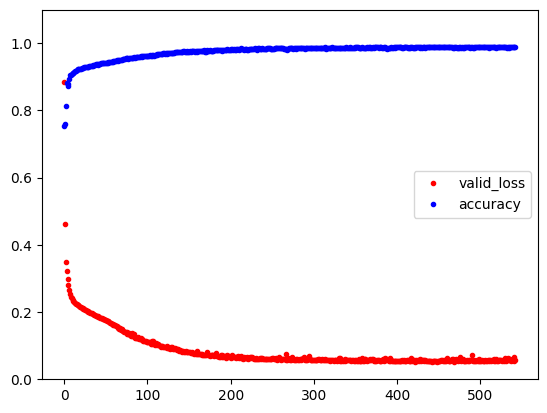

In [40]:
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3, label='valid_loss')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3, label='accuracy')

plt.legend()
plt.ylim(0, 1.1)

plt.show()

### [실습] wine_test.csv => evaluate 해보기

In [41]:
df_test = pd.read_csv('dataset/wine_test.csv', header=None)

print(df_test.shape)
df_test.head()

(1497, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,10.0,0.73,0.43,2.3,0.059,15.0,31.0,0.99660,3.15,0.57,11.0,5,1
1,8.2,0.68,0.30,2.1,0.047,17.0,138.0,0.99500,3.22,0.71,10.8,4,0
2,8.8,0.24,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.3,7,1
3,7.0,0.24,0.34,1.4,0.031,27.0,107.0,0.99000,3.06,0.39,11.9,6,0
4,7.5,0.77,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,5,1


In [42]:
dataset = df_test.values

X_test = dataset[:, 0:12]
y_test = dataset[:, 12]

In [43]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9880


[0.05253753811120987, 0.9879759550094604]

# 저장된 모델을 불러와서 사용하기


In [45]:
import keras
model2 = keras.models.load_model("./model/320-0.0545.hdf5")
model2

In [46]:
# 평가
model2.evaluate(X_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9860


[0.0531088262796402, 0.9859719276428223]

In [47]:
# 추론
model2.predict(X_test)

47/47 [==============================] - 0s 1ms/step


array([[0.9999999 ],
       [0.7337909 ],
       [0.9999829 ],
       ...,
       [0.00649935],
       [0.9999569 ],
       [0.00445369]], dtype=float32)